In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [4]:
dataset_dir = r"C:\Users\Aditi Vikas Londhe\Downloads\caltech-101-img-20251108T064143Z-1-001\caltech-101-img"
dataset_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

# here batch_size is the number of images in each batch
batch_size = 2000
dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 9145 images belonging to 102 classes.


In [5]:
x_train, y_train =  dataset_generator[0]
x_test, y_test = dataset_generator[1]

print(len(x_train))
print(len(x_test))

2000
2000


In [6]:
# Load VGG16 without top layers
weights_path = "vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))

In [7]:
for layer in base_model.layers:
   layer.trainable = False

In [8]:
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 221s 7s/step - accuracy: 0.2025 - loss: 3.9738 - val_accuracy: 0.3000 - val_loss: 3.4104
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 324s 9s/step - accuracy: 0.3530 - loss: 3.0593 - val_accuracy: 0.4005 - val_loss: 2.9284
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 259s 8s/step - accuracy: 0.4625 - loss: 2.5516 - val_accuracy: 0.4480 - val_loss: 2.6110
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 245s 8s/step - accuracy: 0.5305 - loss: 2.1531 - val_accuracy: 0.5005 - val_loss: 2.3750
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 233s 7s/step - accuracy: 0.6030 - loss: 1.8405 - val_accuracy: 0.5275 - val_loss: 2.2107
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 294s 8s/step - accuracy: 0.6580 - loss: 1.5847 - val_accuracy: 0.5450 - val_loss: 2.0922
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 247s 8s/step - accuracy: 0.7090 - loss: 1.3898 - val_accuracy: 0.5495 - val_loss: 2.0114
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 249s 8s/step - accuracy: 0.7455 - loss: 1.2253 - val_accuracy: 0.5605 - v

In [10]:
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))
# freeze all layers first
for layer in base_model.layers:
   layer.trainable = False
# unfreeze last 4 layers of base model
for layer in base_model.layers[len(base_model.layers) - 2:]:
   layer.trainable = True
# fine-tuning hyper parameters
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# training fine tuned model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 348s 11s/step - accuracy: 0.3615 - loss: 3.0952 - val_accuracy: 0.4685 - val_loss: 2.3640
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 273s 9s/step - accuracy: 0.5765 - loss: 1.7823 - val_accuracy: 0.5680 - val_loss: 1.8960
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 257s 8s/step - accuracy: 0.6995 - loss: 1.1474 - val_accuracy: 0.6010 - val_loss: 1.7506
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 275s 9s/step - accuracy: 0.8195 - loss: 0.6811 - val_accuracy: 0.6145 - val_loss: 1.7212
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 318s 9s/step - accuracy: 0.8720 - loss: 0.4573 - val_accuracy: 0.6315 - val_loss: 1.7351
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 286s 9s/step - accuracy: 0.9140 - loss: 0.3132 - val_accuracy: 0.6225 - val_loss: 1.8111
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 289s 9s/step - accuracy: 0.9440 - loss: 0.2463 - val_accuracy: 0.6145 - val_loss: 1.8953
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 398s 12s/step - accuracy: 0.9615 - loss: 0.1282 - val_accuracy: 0.6370 -

In [23]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step


In [24]:
labels = list(dataset_generator.class_indices.keys())

Predicted: Faces
Actual: Faces


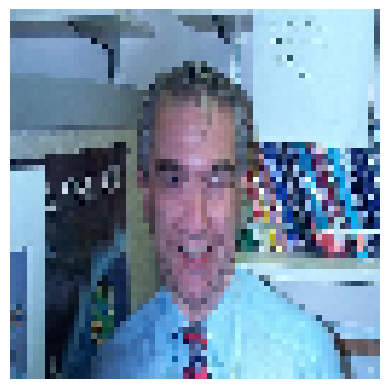

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Pick a random index between 0 and len(x_test) - 1
n = np.random.randint(0, len(x_test))

# Show the image
plt.imshow(x_test[n])
plt.axis('off')  # optional, hides axes

# Print predictions
print("Predicted:", labels[np.argmax(predicted_value[n])])
print("Actual:", labels[np.argmax(y_test[n])])
